In [ ]:
from transformato import FreeEnergyCalculator

import transformato
import pytest
import sys, os
import logging
import shutil
import pathlib
from transformato import load_config_yaml, SystemStructure, ProposeMutationRoute, IntermediateStateFactory
import parmed as pm
import copy
import numpy as np
# read in specific topology with parameters
from parmed.charmm.parameters import CharmmParameterSet
import subprocess

from transformato import FreeEnergyCalculator
for conf in ['../config/ethane-ethanol-solvation-free-energy.yaml']:
    configuration = load_config_yaml(config=conf,
                                     input_dir='../data/', output_dir='data')

    # load systems
    s1 = SystemStructure(configuration, 'structure1')
    s2 = SystemStructure(configuration, 'structure2')
    a = ProposeMutationRoute(s1, s2)

    # manually matching Oxygen (0) with Hydrogen (4) 
    a.add_idx_to_common_core_of_mol1(4)
    a.add_idx_to_common_core_of_mol2(0)

    # generate mutation route
    mutation_list = a.generate_mutations_to_common_core_for_mol1(
        nr_of_steps_for_el=5, nr_of_steps_for_bonded_parameters=5)
    # write intermediate states for systems
    i = IntermediateStateFactory(system=s1, mutation_list=mutation_list, configuration=configuration)
    i.generate_intermediate_states()
    paths = pathlib.Path(i.path).glob('**/*.sh')
    for path in sorted(paths):
        run_dir = path.parent
        # because path is object not string
        print(f"Start sampling for: {path}")
        print(f"In directory: {run_dir}")
        try:
            exe = subprocess.run(['bash', str(path), str(run_dir)], check=True, capture_output=True, text=True)
        except TypeError:
            exe = subprocess.run(['bash', str(path), str(run_dir)], check=True,
                                 stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        print(exe.stdout)
        print('Capture stderr')
        print(exe.stderr)

    # generate mutation route
    mutation_list = a.generate_mutations_to_common_core_for_mol2(nr_of_steps_for_el=5)
    # write intermediate states
    i = IntermediateStateFactory(system=s2, mutation_list=mutation_list, configuration=configuration)
    i.generate_intermediate_states()

    paths = pathlib.Path(i.path).glob('**/*.sh')
    for path in sorted(paths):
        run_dir = path.parent
        # because path is object not string
        print(f"Start sampling for: {path}")
        print(f"In directory: {run_dir}")
        try:
            exe = subprocess.run(['bash', str(path), str(run_dir)], check=True, capture_output=True, text=True)
        except TypeError:
            exe = subprocess.run(['bash', str(path), str(run_dir)], check=True,
                                 stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        print(exe.stdout)
        print('Capture stderr')
        print(exe.stderr)

    f = FreeEnergyCalculator(configuration, 'ethane')
    f.load_trajs(thinning=1)
    f.calculate_dG_to_common_core()
    ddG, dddG = f.end_state_free_energy_difference
    print(f"Free energy difference: {ddG}")
    print(f"Uncertanty: {dddG}")
    #assert(ddG == 10.0)

    f.show_summary()

    f = FreeEnergyCalculator(configuration, 'ethanol')
    f.load_trajs(thinning=1)
    f.calculate_dG_to_common_core()

    f.show_summary()


RDKit WARNING: [16:43:12] Enabling RDKit 2019.09.2 jupyter extensions
/home/mwieder/anaconda3/envs/transformato/lib/python3.7/site-packages/transformato-0.0.0+117.gbcc80b0.dirty-py3.7.egg/transformato/utils.py:21: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  settingsMap = yaml.load(stream)
/home/mwieder/anaconda3/envs/transformato/lib/python3.7/site-packages/parmed/charmm/parameters.py:905: UserWarning: LONEPAIR type COLINEAR not supported; only BISEctor and RELAtive supported
  'RELAtive supported' % words[1])
/home/mwieder/anaconda3/envs/transformato/lib/python3.7/site-packages/parmed/charmm/parameters.py:832: UserWarning: No charge for WEI3
  warnings.warn('No charge for %s' % resname)
/home/mwieder/anaconda3/envs/transformato/lib/python3.7/site-packages/parmed/charmm/parameters.py:867: UserWarning: WARNING: Ignoring "DELETE ACCE NE2" because entity type ACCE not us

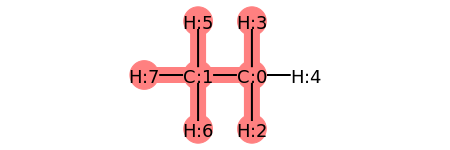

[mutate.py:113 - _calculate_common_core()] Substructere match idx: (1, 2, 5, 6, 7, 3, 4)


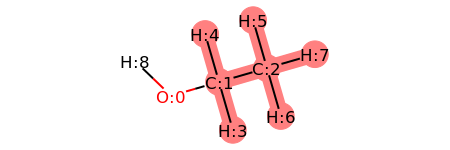

[mutate.py:275 - _mutate_to_common_core()] No atoms will be decoupled.
[mutate.py:219 - _transform_common_core()] ###########
[mutate.py:220 - _transform_common_core()] Atom that needs to be transformed: <Atom C1 [0]; In LIG 0>.
[mutate.py:221 - _transform_common_core()] Atom type of atom in cc1: CG331.
[mutate.py:222 - _transform_common_core()] Template atom: <Atom C1 [1]; In UNL 0>.
[mutate.py:223 - _transform_common_core()] Atom type of atom in cc2: CG321.
[mutate.py:219 - _transform_common_core()] ###########
[mutate.py:220 - _transform_common_core()] Atom that needs to be transformed: <Atom H1 [2]; In LIG 0>.
[mutate.py:221 - _transform_common_core()] Atom type of atom in cc1: HGA3.
[mutate.py:222 - _transform_common_core()] Template atom: <Atom H1 [3]; In UNL 0>.
[mutate.py:223 - _transform_common_core()] Atom type of atom in cc2: HGA2.
[mutate.py:219 - _transform_common_core()] ###########
[mutate.py:220 - _transform_common_core()] Atom that needs to be transformed: <Atom H2 [3]

[0, 1, 5, 6, 7, 2, 3, 4]
[1, 2, 5, 6, 7, 3, 4, 0]


[state.py:187 - _copy_files()] No restart file found for vacuum -- starting simulation from crd file.
[state.py:196 - _copy_files()] No crd file found for vacuum -- using parmed system structure to create crd file.
[state.py:87 - _write_state()] #########################################
[state.py:88 - _write_state()] #########################################
[state.py:89 - _write_state()] Current step: 1
[state.py:474 - _init_intermediate_state_dir()]  - Created directory: - /home/mwieder/Work/Projects/transformato/notebooks/data/ethane-ethanol-solvation-free-energy/ethane/intst2
[state.py:476 - _init_intermediate_state_dir()]  - Writing in - /home/mwieder/Work/Projects/transformato/notebooks/data/ethane-ethanol-solvation-free-energy/ethane/intst2
[mutate.py:563 - mutate()]  -- Charge/Atom/Bond/Angle/Torsion parameters from cc1 are transformed to cc2.
[mutate.py:564 - mutate()] Scaling factor:0.2
[mutate.py:582 - _modify_type()] Setting RRR atomtype for atom: <Atom C1 [0]; In LIG 0>.
[

[mutate.py:615 - _compensate_charge()] ##############
[mutate.py:616 - _compensate_charge()] Charge to compensate: 0.08399999999999996
[mutate.py:618 - _compensate_charge()] 0.010499999999999995
[mutate.py:619 - _compensate_charge()] ##############
[mutate.py:677 - mutate()]  -- Charge to zero mutation.
[mutate.py:678 - mutate()] Scaling factor: 0.8
[mutate.py:683 - mutate()] Scale charge on <Atom H6 [8]; In UNL 0>
[mutate.py:684 - mutate()] Old charge: 0.42
[mutate.py:686 - mutate()] New charge: 0.336
[mutate.py:615 - _compensate_charge()] ##############
[mutate.py:616 - _compensate_charge()] Charge to compensate: 0.08399999999999996
[mutate.py:618 - _compensate_charge()] 0.010499999999999995
[mutate.py:619 - _compensate_charge()] ##############
[state.py:187 - _copy_files()] No restart file found for vacuum -- starting simulation from crd file.
[state.py:196 - _copy_files()] No crd file found for vacuum -- using parmed system structure to create crd file.
[state.py:87 - _write_state(

[state.py:476 - _init_intermediate_state_dir()]  - Writing in - /home/mwieder/Work/Projects/transformato/notebooks/data/ethane-ethanol-solvation-free-energy/ethanol/intst7
[mutate.py:725 - mutate()]  -- Steric interactions to zero mutation.
[mutate.py:726 - mutate()] Acting on atoms: [8]
[mutate.py:725 - mutate()]  -- Steric interactions to zero mutation.
[mutate.py:726 - mutate()] Acting on atoms: [8]
[state.py:187 - _copy_files()] No restart file found for vacuum -- starting simulation from crd file.
[state.py:196 - _copy_files()] No crd file found for vacuum -- using parmed system structure to create crd file.


In [1]:
from transformato import FreeEnergyCalculator

import transformato
import pytest
import sys, os
import logging
import shutil
import pathlib
from transformato import load_config_yaml, SystemStructure, ProposeMutationRoute, IntermediateStateFactory
import parmed as pm
import copy
import numpy as np
# read in specific topology with parameters
from parmed.charmm.parameters import CharmmParameterSet
import subprocess

from transformato import FreeEnergyCalculator
for conf in ['../config/ethane-ethanol-solvation-free-energy.yaml']:
    configuration = load_config_yaml(config=conf,
                                     input_dir='../data/', output_dir='data')

    # load systems
    s1 = SystemStructure(configuration, 'structure1')
    s2 = SystemStructure(configuration, 'structure2')
    a = ProposeMutationRoute(s1, s2)

    # manually matching Oxygen (0) with Hydrogen (4) 
    a.add_idx_to_common_core_of_mol1(4)
    a.add_idx_to_common_core_of_mol2(0)

    # generate mutation route
    mutation_list = a.generate_mutations_to_common_core_for_mol1(
        nr_of_steps_for_el=5, nr_of_steps_for_bonded_parameters=5)
    # write intermediate states for systems
    i = IntermediateStateFactory(system=s1, mutation_list=mutation_list, configuration=configuration)
    i.generate_intermediate_states()

    # generate mutation route
    mutation_list = a.generate_mutations_to_common_core_for_mol2(nr_of_steps_for_el=5)
    # write intermediate states
    i = IntermediateStateFactory(system=s2, mutation_list=mutation_list, configuration=configuration)
    i.generate_intermediate_states()


In [3]:
%cat data/ethane-ethanol-solvation-free-energy/ethane/intst6/lig_in_vacuum.psf

PSF CHEQ EXT XPLOR

         1 !NTITLE


         8 !NATOM
         1 HETA     1        LIG      C1       RRR0     0.100500       12.0110           
         2 HETA     1        LIG      C2       CG331   -0.217500       12.0110           
         3 HETA     1        LIG      H1       RRR1     0.142500        1.0080           
         4 HETA     1        LIG      H2       RRR2     0.142500        1.0080           
         5 HETA     1        LIG      H3       RRR3    -0.595500        1.0080           
         6 HETA     1        LIG      H4       HGA3     0.142500        1.0080           
         7 HETA     1        LIG      H5       HGA3     0.142500        1.0080           
         8 HETA     1        LIG      H6       HGA3     0.142500        1.0080           

         7 !NBOND: bonds
         1         2         1         3         1         4         1         5
         2         6         2         7         2         8

        12 !NTHETA: angles
         2         1     

In [2]:
%cat data/ethane-ethanol-solvation-free-energy/ethanol/intst7/lig_in_vacuum.psf

PSF CHEQ EXT XPLOR

         1 !NTITLE


         9 !NATOM
         1 HETA     1        UNL      O        OG311   -0.595500       15.9994           
         2 HETA     1        UNL      C1       CG321    0.100500       12.0110           
         3 HETA     1        UNL      C2       CG331   -0.217500       12.0110           
         4 HETA     1        UNL      H1       HGA2     0.142500        1.0080           
         5 HETA     1        UNL      H2       HGA2     0.142500        1.0080           
         6 HETA     1        UNL      H3       HGA3     0.142500        1.0080           
         7 HETA     1        UNL      H4       HGA3     0.142500        1.0080           
         8 HETA     1        UNL      H5       HGA3     0.142500        1.0080           
         9 HETA     1        UNL      H6       DDD0     0.000000        1.0080           

         8 !NBOND: bonds
         1         2         1         9         2         3         2         4
         2         5    